# Import Packages

In [298]:
import matplotlib.pyplot as plt
from utils import create_dataset,model_plot,history_plot, read_data, plot_data, prepare_train_test_data
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error as mae

In [299]:
clean_df, data = read_data('../../datasets/yt_subscribers.csv', debug=True)

         Date  Subscribers  Unnamed: 2  Unnamed: 3  Unnamed: 4
0   8/26/2024           40         NaN         NaN         NaN
1  10/13/2024           39         NaN         NaN         NaN
2   3/28/2024           38         NaN         NaN         NaN
3   8/25/2024           38         NaN         NaN         NaN
4   7/18/2024           37         NaN         NaN         NaN
5   9/16/2024           36         NaN         NaN         NaN
6   8/10/2024           34         NaN         NaN         NaN
7   7/26/2024           33         NaN         NaN         NaN
8    9/1/2024           33         NaN         NaN         NaN
9   11/4/2024           33         NaN         NaN         NaN
----------------------------------------------------
          Date  Subscribers
254 2023-11-15           13
336 2023-11-16            8
349 2023-11-17            6
301 2023-11-18           10
215 2023-11-19           15
180 2023-11-20           17
361 2023-11-21            3
337 2023-11-22            8
35

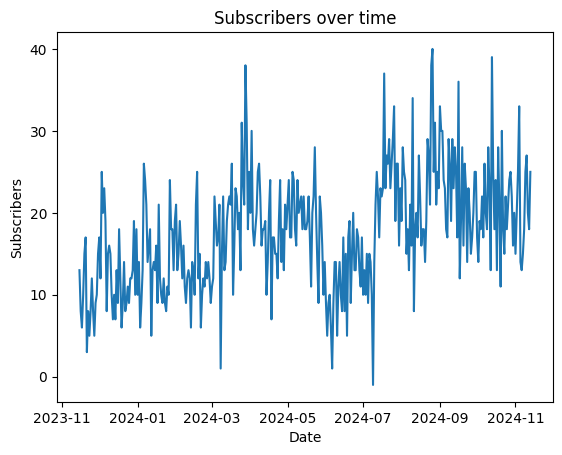

In [300]:
plot_data(clean_df["Subscribers"], title="Subscribers over time", x_label="Date", y_label="Subscribers")

In [301]:
x_train, x_test, y_train, y_test, scaler = prepare_train_test_data(data, time_step_in=7, time_step_out=7, test_size=0.2)

x_train shape: (280, 7), y_train shape: (280, 7), x_test shape: (71, 7), y_test shape: (71, 7)


In [302]:
model_1=Sequential()
model_1.add(Dense(256,input_shape=(7,),activation="relu"))
model_1.add(Dense(128,activation="relu"))
model_1.add(Dense(64,activation="relu"))
model_1.add(Dense(32,activation="relu"))
model_1.add(Dense(7))
model_1.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
model_1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,511 (177.78 KB)

 Trainable params: 45,511 (177.78 KB)

 Non-trainable params: 0 (0.00 B)

In [303]:
history=model_1.fit(
    x_train,y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    verbose=1
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.4059 - mean_absolute_error: 0.4059 - val_loss: 0.2540 - val_mean_absolute_error: 0.2540
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - val_loss: 0.1367 - val_mean_absolute_error: 0.1367
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - val_loss: 0.1238 - val_mean_absolute_error: 0.1238
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - val_loss: 0.1122 - val_mean_absolute_error: 0.1122
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - val_loss: 0.1094 - val_mean_absolute_error: 0.1094
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - val_loss: 0.1127 - val_mean_absolute_error: 0.1127
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - val_loss: 0.1125 - va

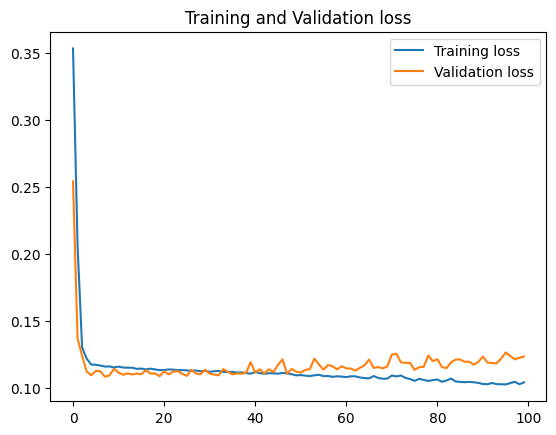

In [304]:
history_plot(history)

In [305]:
train_predicted = model_1.predict(x_train)
test_predicted = model_1.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [306]:
# calculate MAE
mae_error_train= mae(y_train,train_predicted)
mae_error_test= mae(y_test,test_predicted)
print(f"MAE Train data  : {mae_error_train} ")
print(f"MAE  Test data : {mae_error_test} ")

MAE Train data  : 0.10063237532926032 
MAE  Test data : 0.12341547004459093 


In [307]:
all_predictions = []
input_window = x_test[-1]  

for i in range(1, 6): 
    print(f'Step {i} ==> Input Window: {input_window}')
    
    y_temp = model_1.predict(input_window.reshape(1, -1))
    print(f"Prediction Output (y_temp): {y_temp}")
    all_predictions.extend(y_temp[0])  # Add all predicted values from y_temp to the list
    input_window = np.roll(input_window, -1, axis=0)
    input_window[-1] = y_temp[0][0]  

Step 1 ==> Input Window: [0.48780488 0.53658537 0.34146341 0.35897436 0.5        0.41463415
 0.31707317]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediction Output (y_temp): [[0.46496114 0.4773786  0.4577412  0.41177797 0.46339613 0.4325555
  0.43915957]]
Step 2 ==> Input Window: [0.53658537 0.34146341 0.35897436 0.5        0.41463415 0.31707317
 0.46496114]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction Output (y_temp): [[0.4444576  0.45137027 0.4087243  0.38205835 0.4692722  0.36747694
  0.4296152 ]]
Step 3 ==> Input Window: [0.34146341 0.35897436 0.5        0.41463415 0.31707317 0.46496114
 0.44445759]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction Output (y_temp): [[0.38044629 0.40433523 0.41995773 0.40954566 0.4177351  0.39850432
  0.45772767]]
Step 4 ==> Input Window: [0.35897436 0.5        0.41463415 0.31707317 0.46496114 0.44445759
 0.38044629]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediction Output (y_temp): [[0.4541375  0.45548663 0.46354225 0.41900283 0.4497906  0.45145336


In [ ]:
all_predictions=np.array(all_predictions)

In [321]:
num_samples = len(all_predictions) // 7
all_predictions_reshaped = all_predictions.reshape(num_samples, 7)
y_next_30 = scaler.inverse_transform(all_predictions_reshaped)
y_next_30=np.round(y_next_30)
print(y_next_30)

[[18. 19. 18. 17. 18. 17. 17.]
 [17. 18. 16. 16. 18. 14. 17.]
 [15. 16. 16. 17. 16. 15. 18.]
 [18. 18. 18. 17. 17. 18. 17.]
 [17. 18. 17. 16. 18. 15. 17.]]


In [323]:
x_test=scaler.inverse_transform(x_test)
x_train=scaler.inverse_transform(x_train)

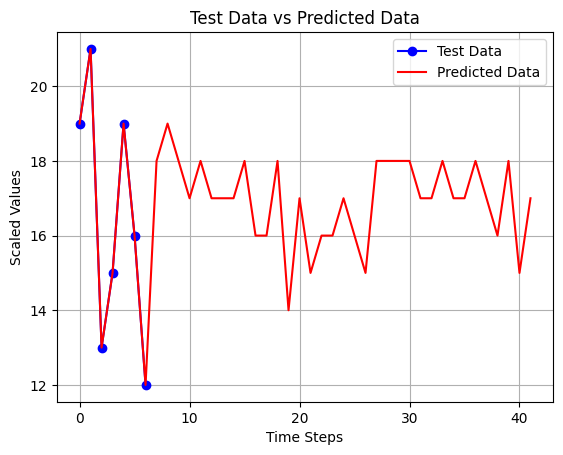

In [325]:
plt.plot(x_test[-1], label='Test Data', color='blue', marker='o')
plt.plot(np.hstack([x_test[-1], y_next_30.reshape(-1)]), label='Predicted Data', color='red')
plt.title('Test Data vs Predicted Data')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

In [328]:
last_date = clean_df.index[-1]
total_sub = np.sum(np.array(clean_df['Subscribers']))
total_next_7 = np.sum(y_next_30)
print(f"Total subscribers till {last_date}: {total_sub}, next_7_days: {np.round(total_next_7)} => final after 7 days: {total_sub + round(total_next_7)}")

Total subscribers till 2024-11-13 00:00:00: 6383, next_7_days: 594.0 => final after 7 days: 6977


In [329]:
avg_sub = np.mean(np.array(clean_df['Subscribers']))
avg_sub * 30

524.6301369863014